## Cloning Git Repo

In [1]:
!git clone "https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments.git"

Cloning into 'TheSchoolOfAI-EVA5-Assignments'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 397 (delta 90), reused 50 (delta 16), pack-reused 209
Receiving objects: 100% (397/397), 9.51 MiB | 37.16 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [2]:
%cd "TheSchoolOfAI-EVA5-Assignments/Assignment 8/src"

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 8/src


## Loading CIFAR-10 Data 

In [3]:
from data_loader import ImageDataLoader
from data_transform import CIFAR10Transforms
import torchvision.transforms as transforms


In [4]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()
cifar10_transform = cifar10.build_transforms(tfms_list=[transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()])

image_loader = ImageDataLoader(cifar10_transform, DATA_DIR, 128, True, 'CIFAR10')

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


### Taking a look at the data

#### Train data

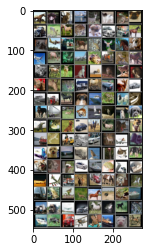

In [5]:
image_loader.show(type='train')

#### Test Data

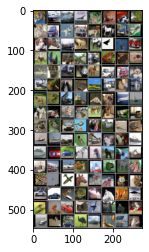

In [6]:
image_loader.show(type='test')

## Defining the CNN Learner

Architecture : **(C1|M1|C2|M2|C3|M3|C4|GAP|O)**

Here we are loading our custom Dialated CNN model which has
* 3 Maxpool layers 
* 1 Dialated Convolution Layer
* 1 Depthwise Seperable Convolution Layer





In [7]:
import torch.nn as nn
import torch.nn.functional as F
from cnn_models import ResNet18
from learner import Learner

In [8]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=ResNet18(),loss_func=F.cross_entropy)

### Model Summary

In [9]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Training

In [10]:
cnn_learner.fit(epochs=10, lr=0.01, step_size=5)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.155502200126648 Batch_id=390 Accuracy=46.92: 100%|██████████| 391/391 [01:03<00:00,  6.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1362, Accuracy: 5857/10000 (58.57%)

EPOCH: 1


Loss=0.7577232718467712 Batch_id=390 Accuracy=67.14: 100%|██████████| 391/391 [01:03<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8747, Accuracy: 6975/10000 (69.75%)

EPOCH: 2


Loss=0.5917949080467224 Batch_id=390 Accuracy=74.98: 100%|██████████| 391/391 [01:04<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7442, Accuracy: 7468/10000 (74.68%)

EPOCH: 3


Loss=0.5085564851760864 Batch_id=390 Accuracy=79.57: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6556, Accuracy: 7764/10000 (77.64%)

EPOCH: 4


Loss=0.6363716125488281 Batch_id=390 Accuracy=82.01: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6448, Accuracy: 7800/10000 (78.00%)

EPOCH: 5


Loss=0.4278200566768646 Batch_id=390 Accuracy=87.05: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4210, Accuracy: 8567/10000 (85.67%)

EPOCH: 6


Loss=0.1906823217868805 Batch_id=390 Accuracy=88.37: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4005, Accuracy: 8630/10000 (86.30%)

EPOCH: 7


Loss=0.3787231147289276 Batch_id=390 Accuracy=88.97: 100%|██████████| 391/391 [01:03<00:00,  6.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3930, Accuracy: 8645/10000 (86.45%)

EPOCH: 8


Loss=0.3101074993610382 Batch_id=390 Accuracy=89.35: 100%|██████████| 391/391 [01:03<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3844, Accuracy: 8691/10000 (86.91%)

EPOCH: 9


Loss=0.28198176622390747 Batch_id=390 Accuracy=89.54: 100%|██████████| 391/391 [01:03<00:00,  6.12it/s]



Test set: Average loss: 0.3827, Accuracy: 8682/10000 (86.82%)



#### Plot Losses and Accuracy(Train and Test)

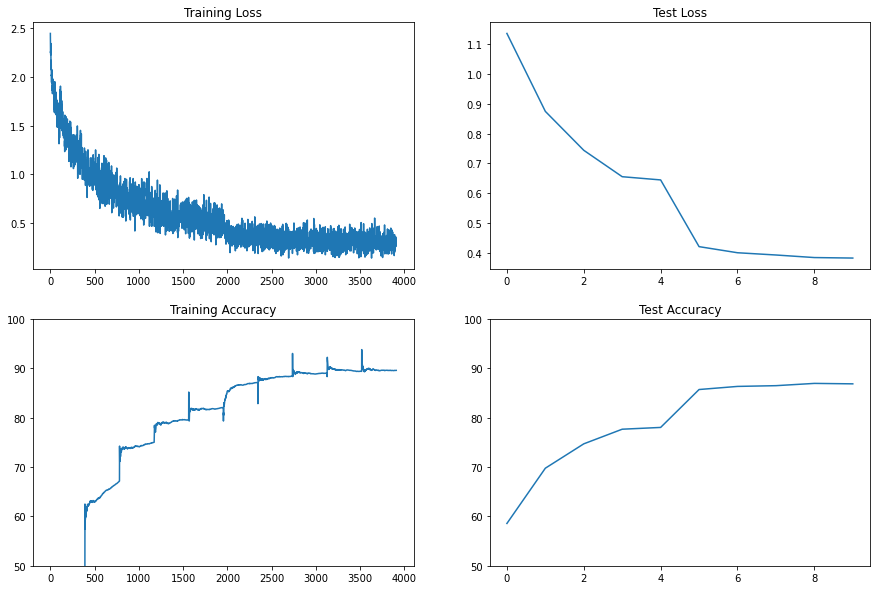

In [11]:
cnn_learner.plot_losses()

## Interpreting the Learner on Test Data

In [12]:
from interpreter import Interpreter

In [13]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 8/src/interpreter.py:38: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = ((predicted == labels) == False).nonzero()


#### Confusion Matrix

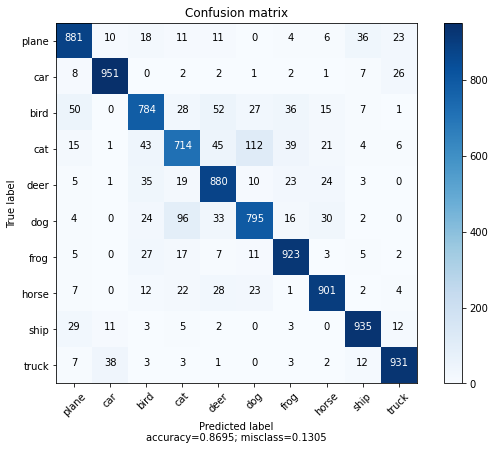

In [14]:
intrepret.plot_confusion_matrix()

#### Performance Metrics
Here we see the Precision, Recall, F1-Score

In [15]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.826133,0.7840,0.804515,1000.0000
car,0.939723,0.9510,0.945328,1000.0000
bird,0.778626,0.7140,0.744914,1000.0000
cat,0.829406,0.8800,0.853954,1000.0000
deer,0.812053,0.7950,0.803436,1000.0000
dog,0.879048,0.9230,0.900488,1000.0000
frog,0.898305,0.9010,0.899651,1000.0000
horse,0.871414,0.8810,0.876181,1000.0000
ship,0.923001,0.9350,0.928962,1000.0000
truck,0.926368,0.9310,0.928678,1000.0000


#### Misclassifications
Visualizing 50 Misclassifications


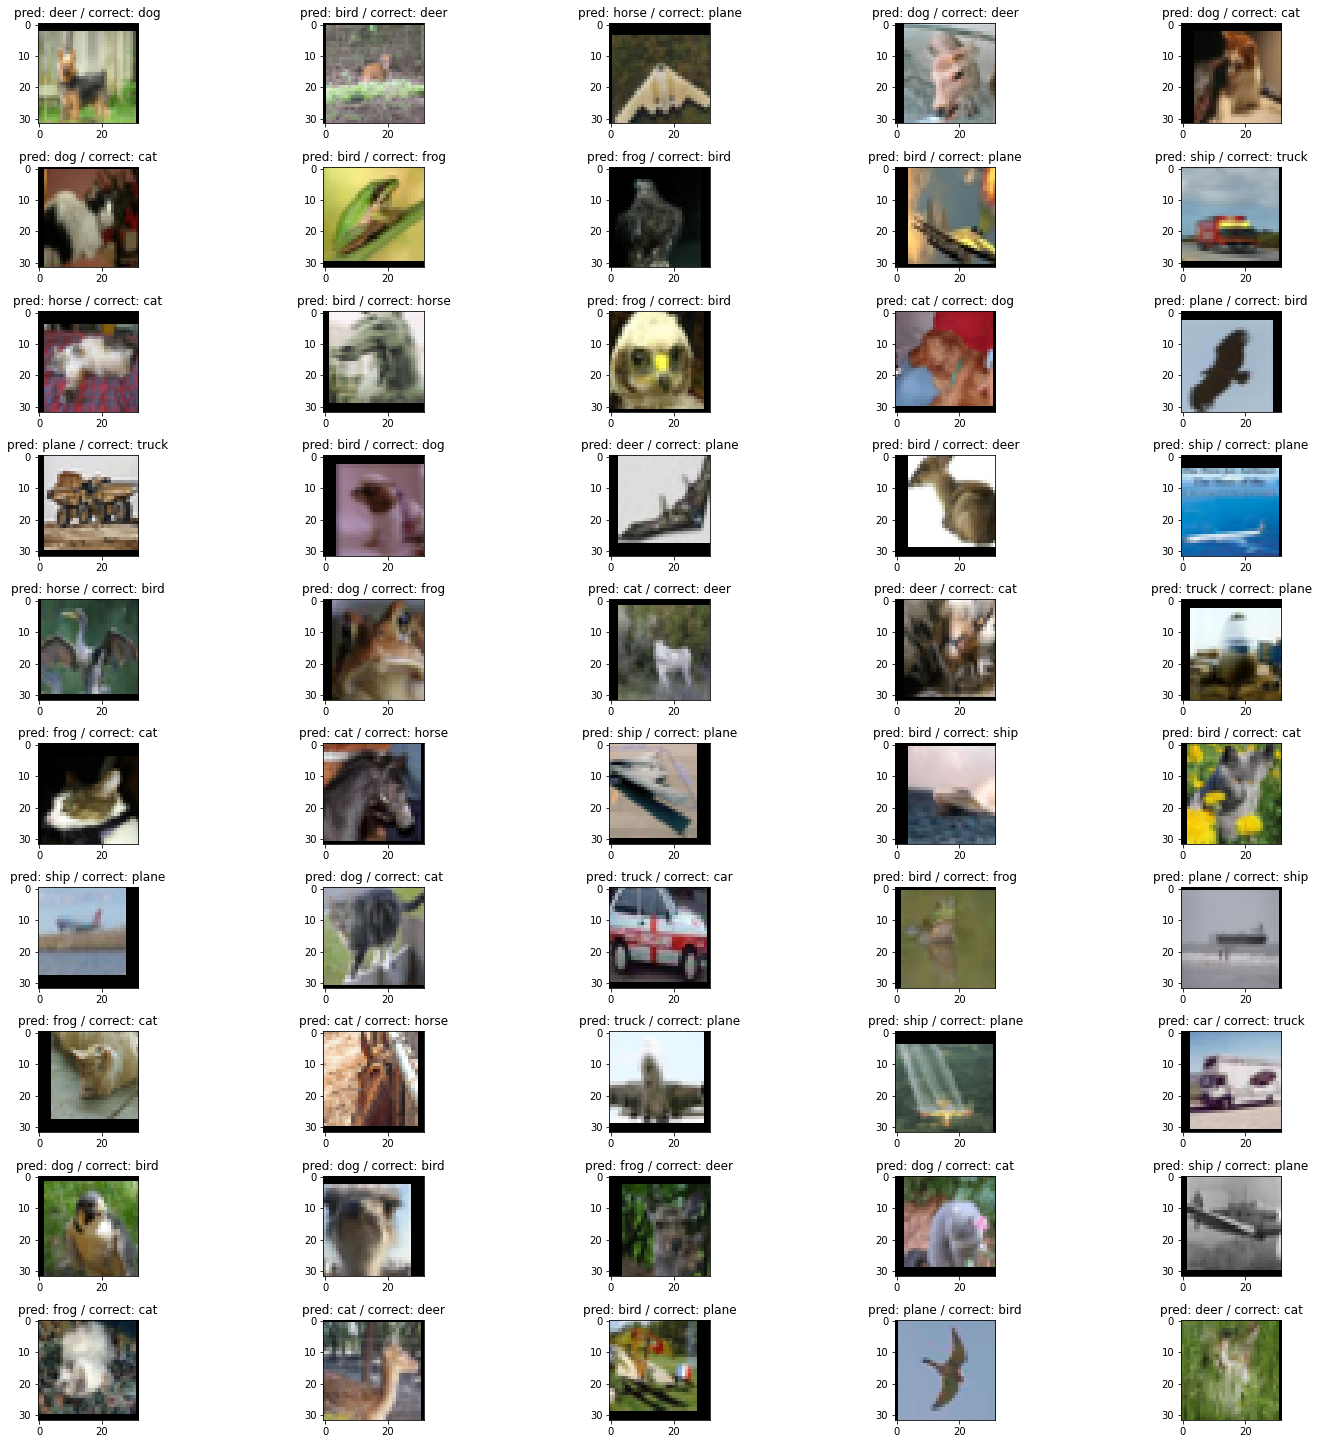

In [16]:
intrepret.show_misclassifications(k=50)